In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station =  Base.classes.station

In [8]:
# Show 1st table columns and data types
Measurement.__table__

Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

In [9]:
# Show 2nd table columns and data types
Station.__table__

Table('station', MetaData(), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)

In [10]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [32]:
# Find the most recent date in the data set. There is a column called date in the Measurement table
for row in session.query(Measurement.date).order_by(Measurement.date.desc()).first():
    print(row)

2017-08-23


In [74]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
date_yr_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(date_yr_ago)

# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= '2016-08-23').all()
# print(last_year_data)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prec_df = pd.DataFrame(last_year_data, columns=['date','precipitation'])

# Sort the dataframe by date
prec_sorted_df = prec_df.sort_values(by="date")

prec_sorted_df.head(10)

2016-08-23


,date,precipitation
0,2016-08-23,0.0
1009,2016-08-23,NaN
1529,2016-08-23,45.5
704,2016-08-23,1.3
361,2016-08-23,3.8
1881,2016-08-23,17.8
1192,2016-08-23,0.5
1,2016-08-24,2.0
1530,2016-08-24,54.6
705,2016-08-24,57.9


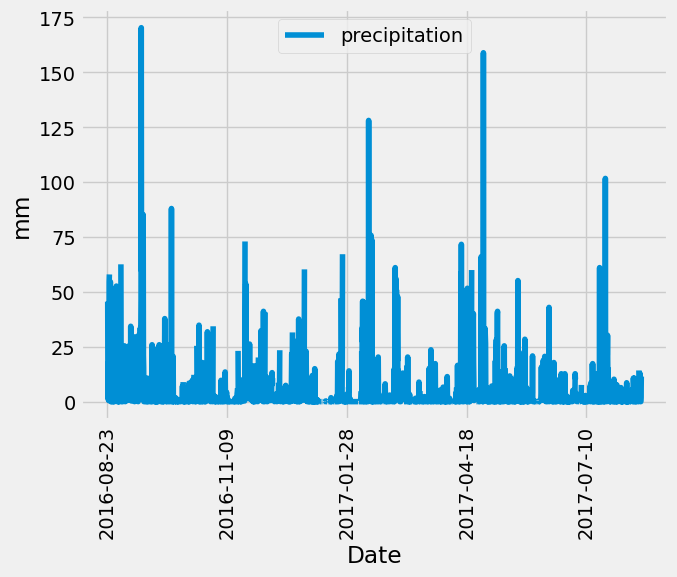

In [46]:
# Use Pandas Plotting with Matplotlib to plot the data
prec_sorted_df.plot(x="date", y="precipitation", kind="line", figsize=(7, 6))
plt.xlabel("Date")
plt.ylabel("mm")
plt.legend(["precipitation"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [47]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_sorted_df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [179]:
# Display first row data in dic format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f3bec4e5c0>,
 'id': 0,
 'latitude': 21.2716,
 'elevation': 0.914,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

In [65]:
# Design a query to calculate the total number of stations in the dataset
no_stations = session.query(Measurement).group_by(Measurement.station).count()
no_stations

9

In [67]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
# List the stations and their counts in descending order.
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [69]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
calcs = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == "USC00519281").all()
calcs

[(12.2, 29.4, 22.035822510822513)]

In [70]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_year_temps = session.query(Measurement.tobs).\
                    filter(Measurement.date >= date_yr_ago).\
                    filter(Measurement.station == "USC00519281").all()
print(last_year_temps)

# Save the query results as a Pandas DataFrame.
temp_df = pd.DataFrame(last_year_temps)
temp_df.head()


[(25.0,), (25.0,), (26.7,), (26.7,), (23.9,), (22.8,), (25.6,), (25.0,), (25.6,), (26.7,), (26.7,), (25.6,), (25.6,), (25.6,), (22.8,), (23.3,), (26.7,), (26.1,), (25.0,), (26.7,), (24.4,), (26.1,), (23.9,), (26.1,), (25.6,), (26.1,), (25.6,), (25.6,), (24.4,), (23.3,), (25.0,), (25.6,), (26.1,), (26.1,), (25.0,), (26.7,), (25.6,), (25.6,), (25.6,), (25.0,), (26.1,), (26.1,), (26.1,), (26.1,), (23.9,), (24.4,), (22.8,), (22.2,), (21.7,), (25.0,), (26.1,), (25.6,), (26.1,), (25.0,), (26.1,), (25.0,), (25.6,), (25.6,), (25.6,), (25.6,), (25.0,), (23.3,), (23.9,), (24.4,), (22.8,), (24.4,), (23.3,), (25.0,), (24.4,), (24.4,), (23.3,), (23.9,), (23.9,), (23.9,), (23.9,), (21.7,), (17.2,), (21.1,), (20.0,), (19.4,), (25.0,), (23.3,), (25.0,), (24.4,), (24.4,), (23.9,), (24.4,), (23.9,), (22.8,), (23.9,), (22.8,), (23.9,), (23.3,), (23.9,), (23.3,), (23.9,), (22.8,), (23.9,), (22.8,), (22.8,), (23.3,), (21.1,), (22.2,), (21.1,), (19.4,), (19.4,), (20.6,), (21.1,), (20.0,), (20.6,), (20.6,), 

,tobs
0,25.0
1,25.0
2,26.7
3,26.7
4,23.9


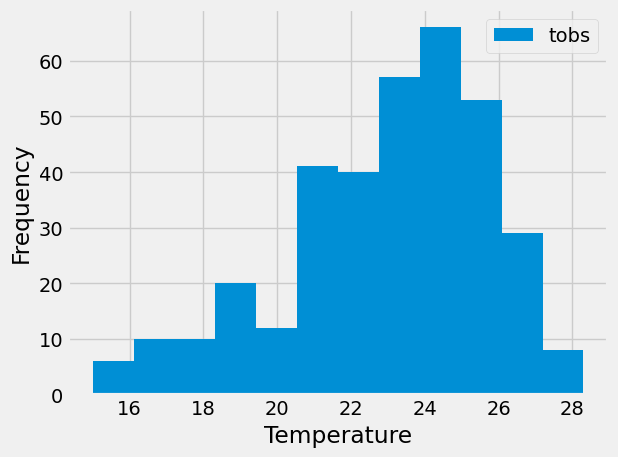

In [71]:
# Use Matplotlib to plot the data
plt.hist(temp_df, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.tight_layout()
plt.show()


# Close Session

In [72]:
# Close Session
session.close()
